 ## Домашнее задание Проверка гипотез

In [1]:
import scipy.stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


<div class="alert alert-info">
<b>Задание № 1</b>
    
Разработайте функцию для проверки нормальности распределения выборки данных, используя шаблон ниже. Вы можете использовать один из известных Вам статистических тестов.
</div>

In [2]:
# Немного преобразовал функцию, заменив принт на возвращаемое значение.
# Надеюсь это не будет считаться ошибкой 
def check_normality(data):
    _, p = st.shapiro(data)
    return p > 0.05

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин.
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
- Является ли результат полезным с практической точки зрения? Почему да или нет?
</div>

In [14]:
np.random.seed(42) #фиксация случайности

mens  = st.norm.rvs(loc=171, scale=10, size=150000)  # Выборка мужчин со средним ростом 171
womens = st.norm.rvs(loc=170, scale=10, size=150000)  # Выборка женщин со средним ростом 170

In [9]:
check_normality(mens), check_normality(womens)

/Users/vadim/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(True, True)

In [22]:
# Распределение нормальное, проверяем дальше
stat, p = st.ttest_ind(mens, womens)
stat, p 


(28.313635693327363, 4.013049237709119e-176)

Видимо я что-то не понял, но p < альфа. Выборки скорее всего различны 

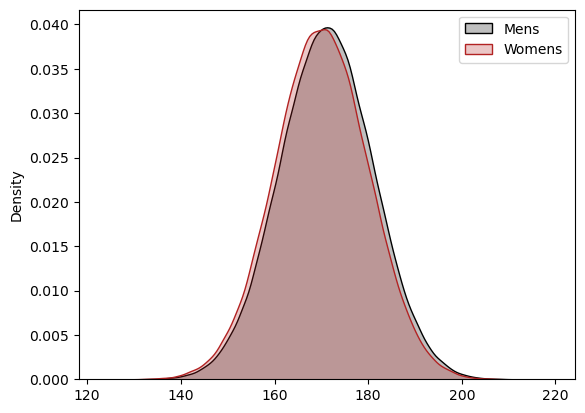

In [20]:
sns.kdeplot(mens, label="Mens", fill = True, color = '#000000')
sns.kdeplot(womens, label="Womens", fill = True, color = '#B22222')
plt.legend()
plt.show()

<div class="alert alert-info">
<b>Задание № 3</b>

Специалист по кадрам, работающий в технологической компании, интересуется сверхурочным временем разных команд. Чтобы выяснить, есть ли разница между сверхурочной работой команды разработчиков программного обеспечения и группы тестирования, она случайным образом выбрала 17 сотрудников в каждой из двух команд и записала их среднее сверхурочное время за неделю в пересчете на час. Данные ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между переутомлением двух команд, используя уровень значимости 0,05. Прежде чем приступать к проверке гипотез, проверьте предположение нормальности.
</div>

In [21]:
test_team = [6.2, 7.1, 1.5, 2,3 , 2, 1.5, 6.1, 2.4, 2.3, 12.4, 1.8, 5.3, 3.1, 9.4, 2.3, 4.1]
developer_team = [2.3, 2.1, 1.4, 2.0, 8.7, 2.2, 3.1, 4.2, 3.6, 2.5, 3.1, 6.2, 12.1, 3.9, 2.2, 1.2 ,3.4]

In [23]:
check_normality(test_team), check_normality(developer_team)

(False, False)

In [24]:
# Расперделения не нормальные, используем тест Манна-Уитни 
stat, p = st.mannwhitneyu(test_team, developer_team)
stat, p

(151.5, 0.8226484074918565)

p > альфа. Разницы между переутомлениями нет

<div class="alert alert-info">
<b>Задание № 4</b>

Педиатр хочет увидеть влияние потребления смеси на среднемесячную прибавку в весе у новорожденных. По этой причине она собрала данные из трех разных групп. Первая группа – дети исключительно грудного вскармливания, вторая группа – дети, которых кормят только смесью, и последняя группа – это дети, находящиеся на искусственном вскармливании и на грудном вскармливании. Эти данные приведены ниже.

В соответствии с этой информацией проведите проверку гипотезы, чтобы проверить, есть ли разница между среднемесячным приростом этих трех групп, используя уровень значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы.
</div>

In [2]:
only_breast = [794.1, 716.9, 993. , 724.7, 760.9, 908.2, 659.3 , 690.8, 768.7, 717.3 , 630.7, 729.5, 714.1, 810.3, 583.5, 679.9, 865.1];
only_formula = [898.8, 881.2, 940.2, 966.2, 957.5, 1061.7, 1046.2, 980.4, 895.6, 919.7, 1074.1, 952.5, 796.3, 859.6, 871.1 , 1047.5, 919.1 , 1160.5, 996.9];
both = [976.4, 656.4, 861.2, 706.8, 718.5, 717.1, 759.8, 894.6, 867.6, 805.6, 765.4, 800.3, 789.9, 875.3, 740. , 799.4, 790.3, 795.2 , 823.6, 818.7, 926.8, 791.7, 948.3];

In [3]:
check_normality(only_breast), check_normality(only_formula), check_normality(both)

NameError: name 'check_normality' is not defined

In [4]:
# Выборки нормальные. 
stat, p = st.levene(only_breast, only_formula, both)
stat, p

(0.266118612498075, 0.7673118764998224)

In [5]:
# Распределения скорее всего одинаковые. Используем однофакторный дисперсионный анализ
stat, p = st.f_oneway(only_breast, only_formula, both)
stat, p

(26.701251857537958, 7.18623550288582e-09)

p < альфа. Есть существенные различия

In [8]:
res = st.tukey_hsd(only_breast, only_formula, both)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)   -209.392     0.000  -281.434  -137.351
 (0 - 2)    -60.129     0.100  -129.149     8.891
 (1 - 0)    209.392     0.000   137.351   281.434
 (1 - 2)    149.264     0.000    82.365   216.162
 (2 - 0)     60.129     0.100    -8.891   129.149
 (2 - 1)   -149.264     0.000  -216.162   -82.365



In [32]:
# Проверим попарно разные группы
stat, p = st.ttest_ind(only_breast, only_formula)
print (f'p-value для грудного и смеси {p}')
stat, p = st.ttest_ind(only_breast,both)
print (f'p-value для грудного и смешанного {p}')
stat, p = st.ttest_ind(both, only_formula)
print (f'p-value для смешанного и смеси {p}')

p-value для грудного и смеси 1.5674024199277872e-07
p-value для грудного и смешанного 0.043151433456058735
p-value для смешанного и смеси 1.1692474866673824e-06


In [35]:
print(np.mean(only_breast), np.mean(only_formula), np.mean(both))

749.8235294117648 959.2157894736845 809.9521739130436


Попарно все p меньше заданного уровня значимости. Различие присутствует между всеми выборками, но между грудным вскармливанием и смешанным оно не так ярко выражено.

С точки зрения прибавки наиболее эффективным является вскармливание смесью.
На грудном вскармливании дети прибавляю меньше всего

<div class="alert alert-info">
<b>Задание № 5 (Опционально) </b>

Аналитик финансовой инвестиционной компании интересуется взаимосвязью между полом и склонностью к риску. Из базы данных была взята случайная выборка из 660 клиентов. Клиенты в выборке были классифицированы в соответствии с их полом и склонностью к риску. Результат приведен в следующей таблице.
    
Проверьте гипотезу о том, что склонность к риску клиентов этой компании не зависит от их пола. Используйте α = 0.01.    
</div>

In [38]:
contingency_table = pd.DataFrame(
    [
        [53, 23, 30, 36, 88],
        [71, 48, 51, 57, 203]
    ],
    index = ['Ж', 'М'])

print('Уровень риска')
print(contingency_table)

Уровень риска
    0   1   2   3    4
Ж  53  23  30  36   88
М  71  48  51  57  203


In [45]:
stat, p, *_ = st.chi2_contingency(contingency_table)
stat, p

(7.094218206100441, 0.13099220858734012)

p > альфа. Склонность к риску от пола не зависит

<div class="alert alert-info">
<b>Задание № 6 (Опционально)</b>

Компания электронной коммерции регулярно размещает рекламу своих кампаний на YouTube, Instagram и Facebook. Однако новому менеджеру было любопытно, есть ли разница между количеством клиентов, привлеченных этими платформами. Поэтому она начала использовать Adjust — приложение, позволяющее узнать, откуда приходят ваши пользователи. Ежедневные цифры, сообщаемые Adjust для каждой платформы, приведены ниже.
    
В соответствии с этой информацией проведите проверку гипотез, чтобы проверить, есть ли разница между средним числом привлеченных клиентов на этих трех платформах с использованием уровня значимости 0,05. Если есть значительная разница, выполните дальнейший анализ, чтобы найти причину разницы. Прежде чем приступать к проверке гипотез, проверьте соответствующие предположения.
</div>

In [48]:
youtube = [1913, 1879, 1939, 2146, 2040, 2127, 2122, 2156, 2036, 1974, 1956, 2146, 2151, 1943, 2125]
instagram = [2305., 2355., 2203., 2231., 2185., 2420., 2386., 2410., 2340., 2349., 2241., 2396., 2244., 2267., 2281.]
facebook = [2133., 2522., 2124., 2551., 2293., 2367., 2460., 2311., 2178., 2113., 2048., 2443., 2265., 2095., 2528.]

In [46]:
check_normality(youtube), check_normality(instagram), check_normality(facebook)

(False, True, True)

In [49]:
# Данные не распреде нормально.
# Возможно я не прав, но мне кажется, что выборки зависимы, т.к. на количество посетителей могло влиять то,
# что данные сняты в один день
# Используем критерий Фридмана

stat, p = st.friedmanchisquare(youtube, instagram, facebook)
stat, p

(22.53333333333333, 1.2792305934136418e-05)

p < альфа. Есть различия. Сравним выборки попарно используя критерий Вилкоксона

In [51]:
stat, p = st.wilcoxon(youtube, instagram)
print (f'p-value для youtube и instagram {p}')
stat, p = st.wilcoxon(youtube, facebook)
print (f'p-value для youtube и facebook {p}')
stat, p = st.wilcoxon(facebook, instagram)
print (f'p-value для facebook и instagram {p}')

p-value для youtube и instagram 6.103515625e-05
p-value для youtube и facebook 6.103515625e-05
p-value для facebook и instagram 0.67877197265625


In [52]:
print(np.mean(youtube), np.mean(facebook), np.mean(facebook))

2043.5333333333333 2295.4 2295.4


Ютуб значимо отличается от Инстаграмм и Фасебук. И проигрывает им по количеству посетителей.
Между Фасебук и инстаграмм нет существенных различий

# **Примечание:**

Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/). Мы не сможем проверить его или помочь, если вы пришлете:

*   файлы;
*   архивы;
*   скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в Discord.

**Как правильно задавать вопросы аспирантам, преподавателям и коллегам:**

Прежде чем задать вопрос, попробуйте найти ответ в интернете. Навык самостоятельного поиска информации — один из важнейших. Каждый практикующий специалист любого уровня делает это ежедневно.

Сформулируйте вопрос по алгоритму:

1.   Что я делаю?
2.   Какого результата я ожидаю?
3.   Как фактический результат отличается от ожидаемого?
4.   Что я уже попробовал сделать, чтобы исправить проблему?

По возможности прикрепите к вопросу скриншоты либо ссылки на код. Не выкладывайте все решение, оставляйте только проблемный и воспроизводимый участок кода.